## Distanced Based Statistics for Planar Point Patterns

**Author: Serge Rey** <sjsrey@gmail.com>

In [1]:
import scipy.spatial
import pysal as ps
import numpy as np
from pointpattern import PointPattern
from process import PoissonPointProcess as csr
from window import as_window
from distance_statistics import G, F, J, K, L
from distance_statistics import Genv, Fenv, Jenv, Kenv, Lenv
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21], [9.47, 31.02],
               [30.78, 60.10], [75.21, 58.93], [79.26,  7.68], [8.23, 39.93],
               [98.73, 80.53], [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
p1 = PointPattern(points)

In [3]:
p1.summary()

Point Pattern
12 points
Bounding rectangle [(8.23,7.68), (98.73,92.08)]
Area of window: 7638.2
Intensity estimate for window: 0.00157105077112
       x      y
0  66.22  32.54
1  22.52  22.39
2  31.01  81.21
3   9.47  31.02
4  30.78  60.10


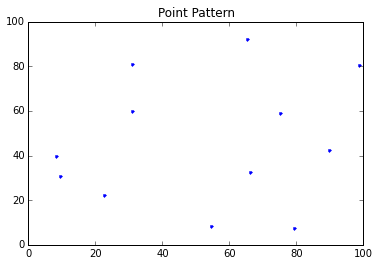

In [4]:
p1.plot()

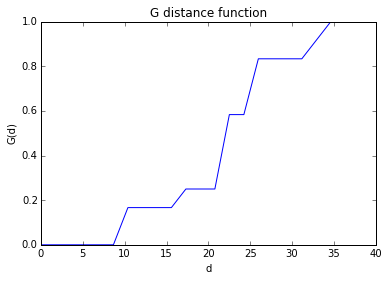

In [5]:
gp1 = G(p1, intervals=20)
gp1.plot()

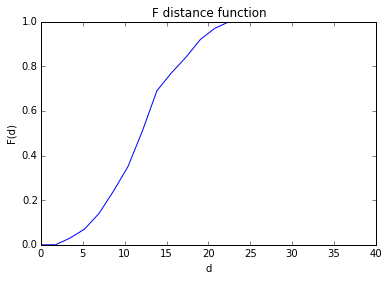

In [6]:
fp1 = F(p1, intervals=20)
fp1.plot()

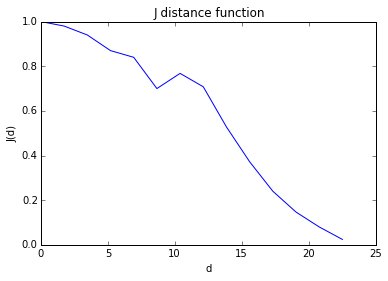

In [7]:
jp1 = J(p1, intervals=20)
jp1.plot()

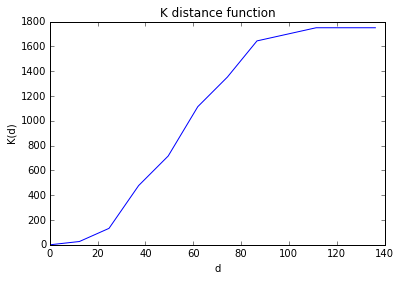

In [8]:
kp1 = K(p1)

kp1.plot()

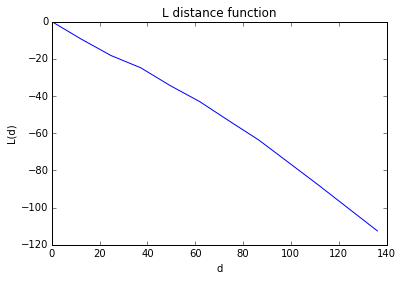

In [9]:
lp1 = L(p1)
lp1.plot()

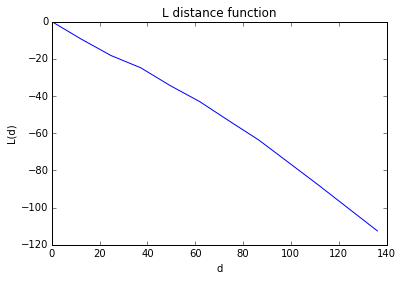

In [10]:
lp1 = L(p1)
lp1.plot()

## Simulation Envelopes

In [11]:
realizations = csr(p1.window, p1.n, 100, asPP=True)
genv = Genv(p1, intervals=20, realizations=realizations)

(100, 22, 2)


In [12]:
genv.observed

array([[  0.        ,   0.        ],
       [  1.73156208,   0.        ],
       [  3.46312417,   0.        ],
       [  5.19468625,   0.        ],
       [  6.92624834,   0.        ],
       [  8.65781042,   0.        ],
       [ 10.3893725 ,   0.16666667],
       [ 12.12093459,   0.16666667],
       [ 13.85249667,   0.16666667],
       [ 15.58405875,   0.16666667],
       [ 17.31562084,   0.25      ],
       [ 19.04718292,   0.25      ],
       [ 20.77874501,   0.25      ],
       [ 22.51030709,   0.58333333],
       [ 24.24186917,   0.58333333],
       [ 25.97343126,   0.83333333],
       [ 27.70499334,   0.83333333],
       [ 29.43655542,   0.83333333],
       [ 31.16811751,   0.83333333],
       [ 32.89967959,   0.91666667],
       [ 34.63124168,   1.        ],
       [ 36.36280376,   1.        ]])

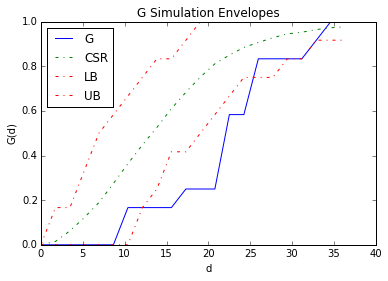

In [13]:
genv.plot()

(100, 22, 2)


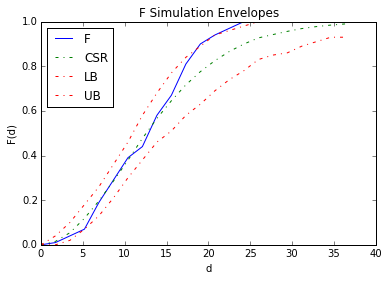

In [14]:
fenv = Fenv(p1, intervals=20, realizations=realizations)
fenv.plot()

(100, 14, 2)


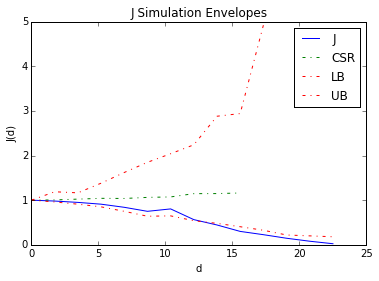

In [15]:
jenv = Jenv(p1, intervals=20, realizations=realizations)
jenv.plot()

(100, 22, 2)


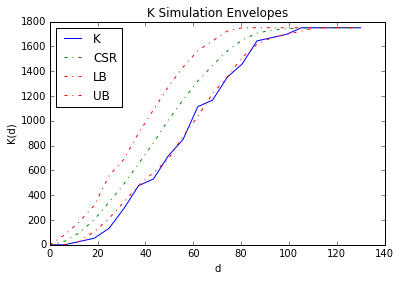

In [16]:
kenv = Kenv(p1, intervals=20, realizations=realizations)
kenv.plot()

(100, 22, 2)


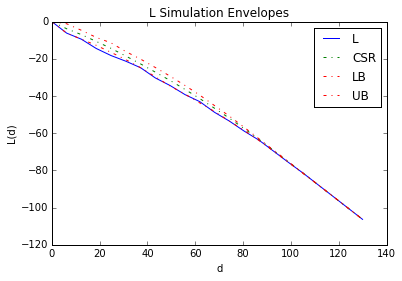

In [17]:
lenv = Lenv(p1, intervals=20, realizations=realizations)
lenv.plot()

## Virgina UTM N17 Example


In [18]:
from pysal.contrib import shapely_ext
va = ps.open(ps.examples.get_path("vautm17n.shp"))
polys = [shp for shp in va]
state = shapely_ext.cascaded_union(polys)

In [19]:
pp = csr(as_window(state), 100, 1, asPP=True).realizations[0]

/Users/serge/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


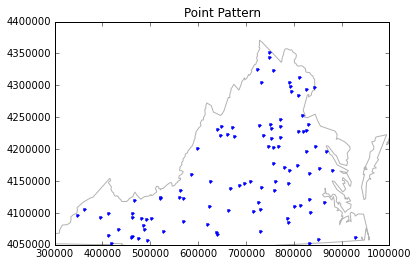

In [20]:
pp.plot(window=True)

In [21]:
# G function using mbb
pp_bb = PointPattern(pp.points)


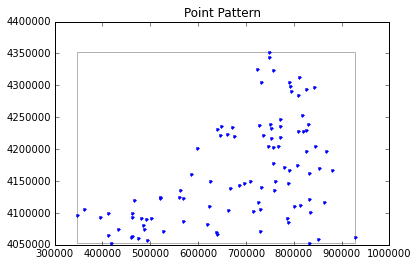

In [22]:
pp_bb.plot(window=True)

In [23]:
# csr in bb
csrs = csr(pp_bb.window, 100, 100, asPP=True)

(100, 12, 2)


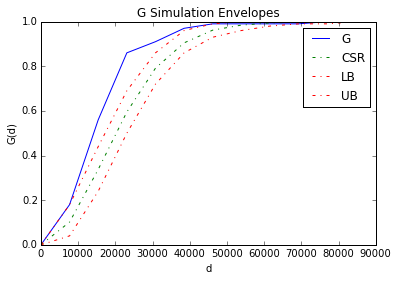

In [24]:
genv_bb = Genv(pp_bb, realizations=csrs)
genv_bb.plot()

(100, 12, 2)


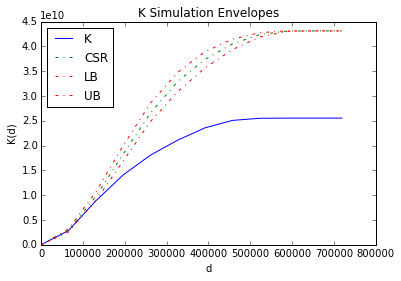

In [25]:
kenv = Kenv(pp, realizations=csrs)
kenv.plot()

(100, 12, 2)


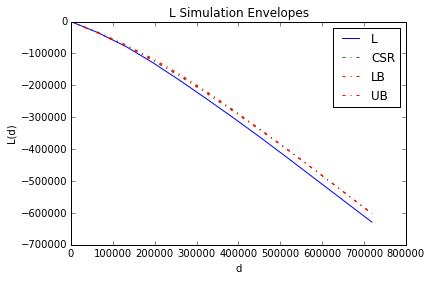

In [26]:
lenv = Lenv(pp, realizations=csrs)
lenv.plot()

In [27]:
# now csr in state window
csrsw = csr(as_window(state), 100, 100, asPP=True)

(100, 12, 2)


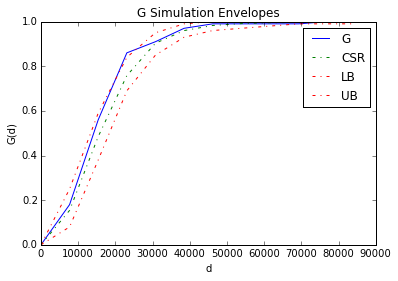

In [28]:
genv = Genv(pp, realizations=csrsw)
genv.plot()

(100, 12, 2)


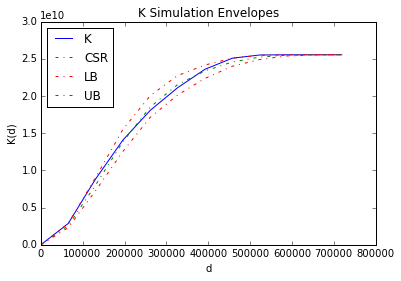

In [29]:
kenv = Kenv(pp, realizations=csrsw)
kenv.plot()

(100, 12, 2)


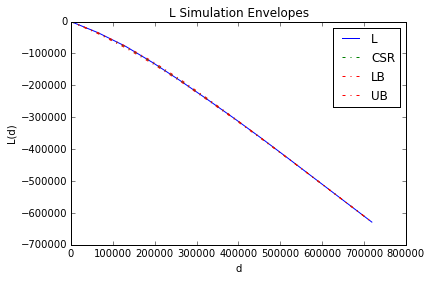

In [30]:
lenv = Lenv(pp, realizations=csrsw)
lenv.plot()